#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
# Student ID: 218197069

# Student name:THAO NGUYEN

In [2]:
# import the necessary modules here 
# to save us from writing some very complex maths code
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [3]:
pwd

'/Users/nguyenthao'

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [4]:
# store the data in a csv file
df = pd.read_csv("A2_clustering.csv")
df.head()

,height,length,width,std,min,max,kurtosis,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [5]:
#Seperate the class
ground_truth = df['Class']
ground_truth.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

In [6]:
#Feature matrix
df_features = df.loc[:, df.columns != 'Class']
df_features.head(10)

,height,length,width,std,min,max,kurtosis
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533


2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

In [7]:
# normalize the data attributes
normdf = StandardScaler().fit_transform(df_features)
normdf 

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

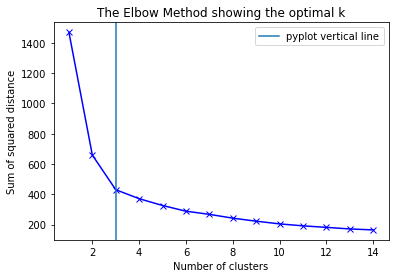

For the given data, we conclude that the optimal number of clusters for the data is 3 and it is same as the actual number of classes in the dataset.


In [8]:
# k means determine k
TotalSqrtDist = []
K_range = range(1,15)
for k in K_range:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normdf)
    TotalSqrtDist.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K_range, TotalSqrtDist, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.title('The Elbow Method showing the optimal k')
plt.axvline(3, 0, 1, label='pyplot vertical line')
plt.legend()
plt.show()

#Print the result
print ('For the given data, we conclude that the optimal number of clusters for the data is 3 and it is same as the actual number of classes in the dataset.')

3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [9]:
# According to the Elbow graph we deterrmine the clusters number as 3. Applying k-means algorithm to the dataset.
from sklearn import cluster

kmeans = KMeans(n_clusters=3,init='k-means++', random_state = 0,max_iter=500)
kmeans.fit(normdf)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
y_pred = kmeans.fit_predict(normdf)# save new clusters for chart

#compute confusion matrix
from sklearn.metrics import confusion_matrix
y_true = ground_truth
y_pred = kmeans.fit_predict(normdf)
confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)
 # Find optimal one-to-one mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
print(row_ind, col_ind)
# Return cluster accuracy
print('purity score:',confusion_matrix[row_ind, col_ind].sum() / np.sum(confusion_matrix))

[[62  6  2]
 [ 5  0 65]
 [ 4 66  0]]
[0 1 2] [0 2 1]
purity score: 0.919047619047619


4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [10]:
!pip3 install pyclustering
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import distance_metric, type_metric

In [11]:
initial_centers = kmeans_plusplus_initializer(normdf, 3,random_state=0).initialize()
itermax = 500

#K-Means using Euclidean
euclidean_metric = distance_metric(type_metric.EUCLIDEAN)
kmeans_instance1 = kmeans(normdf, initial_centers, metric= euclidean_metric,itermax = itermax)
kmeans_instance1.process()
clusters1 = kmeans_instance1.get_clusters()
centroids1 = kmeans_instance1.get_centers()
y_pred1 = kmeans_instance1.predict(normdf)

#compute confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_true, y_pred1)
print('confusion_matrix:',confusion_matrix1)

 # Find optimal one-to-one mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-confusion_matrix1)
purity1 = confusion_matrix1[row_ind, col_ind].sum() / np.sum(confusion_matrix1)
# Return cluster accuracy
print('Purity score of Kmeans using Euclidean:',purity1)

confusion_matrix: [[ 2  9 59]
 [64  0  6]
 [ 0 66  4]]
Purity score of Kmeans using Euclidean: 0.9


In [12]:
#K-Means using Euclidean Square
euclideansquare_metric = distance_metric(type_metric.EUCLIDEAN_SQUARE)
kmeans_instance2 = kmeans(normdf, initial_centers, metric= euclideansquare_metric,itermax = itermax)
kmeans_instance2.process()
clusters2 = kmeans_instance2.get_clusters()
centroids2 = kmeans_instance2.get_centers()
y_pred2 = kmeans_instance2.predict(normdf)

#compute confusion matrix
confusion_matrix2 = confusion_matrix(y_true, y_pred2)
print('confusion_matrix:',confusion_matrix2)

 # Find optimal one-to-one mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-confusion_matrix2)
purity2 = confusion_matrix2[row_ind, col_ind].sum() / np.sum(confusion_matrix2)
# Return cluster accuracy
print('Purity score of Kmeans using Euclidean Square:',purity2)

confusion_matrix: [[ 2  7 61]
 [65  0  5]
 [ 0 66  4]]
Purity score of Kmeans using Euclidean Square: 0.9142857142857143


In [13]:
#K-Means using Manhattan
manhattan_metric = distance_metric(type_metric.MANHATTAN)
kmeans_instance3 = kmeans(normdf, initial_centers, metric=manhattan_metric,itermax = itermax)# create instance of K-Means using specific distance metric
kmeans_instance3.process()# run cluster analysis and obtain results
clusters3 = kmeans_instance3.get_clusters()
centroids3 = kmeans_instance3.get_centers()# print location of clusters learned by kmeans object
y_pred3 = kmeans_instance3.predict(normdf)# save new clusters for chart

#compute confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(y_true, y_pred3)
print('confusion_matrix:',confusion_matrix3)

 # Find optimal one-to-one mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-confusion_matrix3)
purity3 = (confusion_matrix3[row_ind, col_ind].sum() / np.sum(confusion_matrix3))
# Return cluster accuracy
print('Purity score of Kmeans using Manhattan:',purity3)

confusion_matrix: [[ 2 11 57]
 [61  0  9]
 [ 0 68  2]]
Purity score of Kmeans using Manhattan: 0.8857142857142857


In [14]:
#K-Means using Chebyshev
Chebyshev_metric = distance_metric(type_metric.CHEBYSHEV)
kmeans_instance4 = kmeans(normdf, initial_centers, metric= Chebyshev_metric)# create instance of K-Means using specific distance metric
kmeans_instance4.process()# run cluster analysis and obtain results
clusters4 = kmeans_instance4.get_clusters()
centroids4 = kmeans_instance4.get_centers()# print location of clusters learned by kmeans object
y_pred4 = kmeans_instance4.predict(normdf)# save new clusters for chart

#compute confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix4 = confusion_matrix(y_true, y_pred4)
print('confusion_matrix:',confusion_matrix4)

 # Find optimal one-to-one mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-confusion_matrix4)
purity4 = (confusion_matrix4[row_ind, col_ind].sum() / np.sum(confusion_matrix4))
# Return cluster accuracy
print('Purity score of Kmeans using Chebyshev:',purity4)

confusion_matrix: [[ 5  7 58]
 [68  0  2]
 [ 0 61  9]]
Purity score of Kmeans using Chebyshev: 0.8904761904761904


In [15]:
#K-Means using Minkowski
Minkowski_metric = distance_metric(type_metric.MINKOWSKI, degree =4)
kmeans_instance5 = kmeans(normdf, initial_centers, metric= Minkowski_metric,itermax = itermax)# create instance of K-Means using specific distance metric
kmeans_instance5.process()# run cluster analysis and obtain results
clusters5 = kmeans_instance5.get_clusters()
centroids5 = kmeans_instance5.get_centers()# print location of clusters learned by kmeans object
y_pred5 = kmeans_instance5.predict(normdf)# save new clusters for chart

#compute confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix5 = confusion_matrix(y_true, y_pred5)
print('confusion_matrix:',confusion_matrix5)

 # Find optimal one-to-one mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-confusion_matrix5)
purity5 = (confusion_matrix5[row_ind, col_ind].sum() / np.sum(confusion_matrix5))
# Return cluster accuracy
print('Purity score of Kmeans using Minkowski:', purity5)

confusion_matrix: [[ 5  5 60]
 [66  0  4]
 [ 0 65  5]]
Purity score of Kmeans using Minkowski: 0.9095238095238095


In [16]:
purityscores = [[purity1, purity2, purity3, purity4, purity5]]
print(purityscores)
print('Based on purity scores above, purity score of K means using Euclidean Square Distance is highest (approxmiately 91.42%), followed by Euclidean, Minkowski, Chebyshev  and Manhattan.')

[[0.9, 0.9142857142857143, 0.8857142857142857, 0.8904761904761904, 0.9095238095238095]]
Based on purity scores above, purity score of K means using Euclidean Square Distance is highest (approxmiately 91.42%), followed by Euclidean, Minkowski, Chebyshev  and Manhattan.


In [17]:
print('The best distance metric is Squared Euclidean Distance (SED) because it has the highest purity. Thus, SED can be used to avoid the computation of square root to get the squared distance between the data points ')

The best distance metric is Squared Euclidean Distance (SED) because it has the highest purity. Thus, SED can be used to avoid the computation of square root to get the squared distance between the data points 


5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [18]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [19]:
###  ANOVA  ###
# Create features and target
X = df_features
y = y_pred
# Create an SelectKBest object to select features with three best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=3)
# Apply the SelectKBest object to the features and target
selA = fvalue_selector.fit_transform(X, y)
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', selA.shape[1])
print('Features using ANOVA:',selA)

Original number of features: 7
Reduced number of features: 3
Features using ANOVA: [[15.26  14.84   3.312]
 [14.88  14.57   3.333]
 [14.29  14.09   3.337]
 [13.84  13.94   3.379]
 [16.14  14.99   3.562]
 [14.38  14.21   3.312]
 [14.69  14.49   3.259]
 [14.11  14.1    3.302]
 [16.63  15.46   3.465]
 [16.44  15.25   3.505]
 [15.26  14.85   3.242]
 [14.03  14.16   3.201]
 [13.89  14.02   3.199]
 [13.78  14.06   3.156]
 [13.74  14.05   3.114]
 [14.59  14.28   3.333]
 [13.99  13.83   3.383]
 [15.69  14.75   3.514]
 [14.7   14.21   3.466]
 [12.72  13.57   3.049]
 [14.16  14.4    3.129]
 [14.11  14.26   3.168]
 [15.88  14.9    3.507]
 [12.08  13.23   2.936]
 [15.01  14.76   3.245]
 [16.19  15.16   3.421]
 [13.02  13.76   3.026]
 [12.74  13.67   2.956]
 [14.11  14.18   3.221]
 [13.45  14.02   3.065]
 [13.16  13.82   2.975]
 [15.49  14.94   3.371]
 [14.09  14.41   3.186]
 [13.94  14.17   3.15 ]
 [15.05  14.68   3.328]
 [16.12  15.     3.485]
 [16.2   15.27   3.464]
 [17.08  15.38   3.683]
 [14.

In [20]:
df_ANOVA = df[['height','length','min']]
# normalize the data attributes
Anorm = StandardScaler().fit_transform(df_ANOVA)
Anorm 
kmeansA = KMeans(n_clusters=3,init='k-means++',random_state =0,max_iter=500)
kmeansA.fit(Anorm)
centroidsA = kmeansA.cluster_centers_
labelsA = kmeansA.labels_
y_predA = kmeansA.fit_predict(Anorm)

#compute confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrixA = confusion_matrix(y_true, y_predA)
print(confusion_matrixA)

# Return cluster accuracy
row_ind, col_ind = linear_sum_assignment(-confusion_matrixA)
print('cluster_accuracy:',confusion_matrixA[row_ind, col_ind].sum() / np.sum(confusion_matrixA))

[[15  1 54]
 [ 0 55 15]
 [69  0  1]]
cluster_accuracy: 0.8476190476190476


In [21]:
###  CHI-SQUARED  ###
from sklearn.feature_selection import chi2
# Convert to categorical data by converting data to integers
X = X.astype(int)
# Select three features with highest chi-squared statistics
sel = SelectKBest(chi2, k=3)
selC = sel.fit_transform(X, y)
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', selC)

Original number of features: 7
Reduced number of features: [[15 14  2]
 [14 14  1]
 [14 14  2]
 [13 13  2]
 [16 14  1]
 [14 14  2]
 [14 14  3]
 [14 14  2]
 [16 15  2]
 [16 15  1]
 [15 14  4]
 [14 14  1]
 [13 14  3]
 [13 14  3]
 [13 14  2]
 [14 14  4]
 [13 13  5]
 [15 14  1]
 [14 14  1]
 [12 13  4]
 [14 14  3]
 [14 14  2]
 [15 14  0]
 [12 13  1]
 [15 14  1]
 [16 15  0]
 [13 13  3]
 [12 13  2]
 [14 14  2]
 [13 14  3]
 [13 13  0]
 [15 14  3]
 [14 14  3]
 [13 14  2]
 [15 14  2]
 [16 15  2]
 [16 15  2]
 [17 15  2]
 [14 14  3]
 [14 14  6]
 [13 13  2]
 [13 13  2]
 [13 13  2]
 [15 14  4]
 [15 14  3]
 [13 14  1]
 [15 14  1]
 [14 14  2]
 [14 14  2]
 [14 14  2]
 [14 14  3]
 [15 14  5]
 [14 14  4]
 [14 14  3]
 [14 14  1]
 [15 14  1]
 [14 14  2]
 [14 14  1]
 [15 14  1]
 [12 13  1]
 [11 12  2]
 [11 12  2]
 [12 13  3]
 [13 13  4]
 [12 13  1]
 [12 13  2]
 [14 14  1]
 [14 14  2]
 [14 14  1]
 [12 13  3]
 [17 15  4]
 [16 15  4]
 [17 15  4]
 [19 16  2]
 [16 15  4]
 [16 15  4]
 [17 15  3]
 [20 17  4]
 [18 

In [22]:
df_CHI = df[['height','length','max']]
# normalize the data attributes
CHInorm = StandardScaler().fit_transform(df_CHI)
CHInorm 
kmeansC = KMeans(n_clusters=3,init='k-means++',random_state =0, max_iter=500)
kmeansC.fit(CHInorm)
centroidsC = kmeansC.cluster_centers_
labelsC = kmeansC.labels_
y_predC = kmeansC.fit_predict(CHInorm)

#compute confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrixC = confusion_matrix(y_true, y_predC)
print(confusion_matrixC)

# Return cluster accuracy
row_ind, col_ind = linear_sum_assignment(-confusion_matrixC)
print('cluster_accuracy:',confusion_matrixC[row_ind, col_ind].sum() / np.sum(confusion_matrixC))

[[64  5  1]
 [ 5  0 65]
 [ 8 62  0]]
cluster_accuracy: 0.9095238095238095


Based on purity score, feature set using Chi-square has a greater purity score than feature set applied by ANOVA (0.9095 > 0.8476). 

In addition, if we consider other factors such as while Chi-square test is better used for categorical data, ANOVA test is better used for continuous data or we have to transform our data to integer to push Python understand our data as categorical data in order to use Chi-square test, which may affect the outcome, even though ANOVA has lower purity score, ANOVA is chosen. 

However, if we only base on purity results, Chi-square is reccommened and the chosen feature set includes Height, Length, Max.

# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

Cumulative Variance [ 71.8743  88.9825  98.6683  99.6449  99.9122  99.9884 100.    ]


Text(0, 0.5, 'Variance captured')

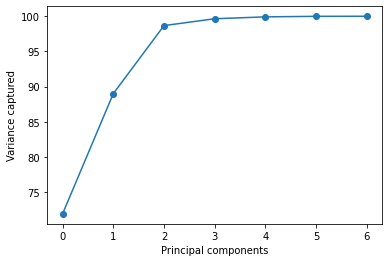

In [23]:
#normalize our data
Xnorm = scale(df_features)
#perform PCA using sklearn PCA implementation
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(Xnorm)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=6)*100)
print('Cumulative Variance', var1)
plt.plot(var1,marker='o')
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [24]:
#What is the minimum dimension that captures at least 89% variance
pca89 =PCA(n_components = 0.89)
pca89.fit(Xnorm)
score_pca89 = pca89.transform(Xnorm)
print('PCA 89% shape:',score_pca89.shape)

PCA 89% shape: (210, 3)


In [25]:
#What is the minimum dimension that captures at least 99% variance
pca99 =PCA(n_components = 0.99)
pca99.fit(Xnorm)
score_pca99 = pca99.transform(Xnorm)
print('PCA 99% shape:',score_pca99.shape)

PCA 99% shape: (210, 4)


In [26]:
print ('The minimum dimension that captures at least 89% variance is 3')
print ('The minimum dimension that captures at least 99% variance is 4')

The minimum dimension that captures at least 89% variance is 3
The minimum dimension that captures at least 99% variance is 4


2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

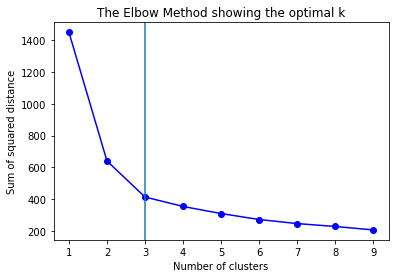

confusion_matrix [[60  2  8]
 [ 5 65  0]
 [ 4  0 66]]
purity score: 90.95238095238095 %


In [27]:
#PCA89
# k means determine k
TotalSqrtDist89 = []
K_range = range(1,10)
for k in K_range:
    kmeanpca89 = KMeans(n_clusters=k,random_state =0,max_iter=500).fit(score_pca89)
    TotalSqrtDist89.append(kmeanpca89.inertia_)

# Plot the elbow
plt.plot(K_range, TotalSqrtDist89, 'bx-', marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.title('The Elbow Method showing the optimal k')
plt.axvline(3, 0, 1)
plt.show()

#Perform kmeans with PCA89
kmeans89 = KMeans(n_clusters=3, init='k-means++',random_state =0,max_iter=500).fit(score_pca89)
centroids89 = kmeans89.cluster_centers_
labels89 = kmeans89.labels_
y_pred89 = kmeans89.fit_predict(score_pca89)

#compute confausion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix89 = confusion_matrix(y_true, y_pred89)
print('confusion_matrix',confusion_matrix89)

# Return cluster accuracy
row_ind, col_ind = linear_sum_assignment(-confusion_matrix89)
purityscore89 = confusion_matrix89[row_ind, col_ind].sum() / np.sum(confusion_matrix89)
print('purity score:',purityscore89*100,"%")

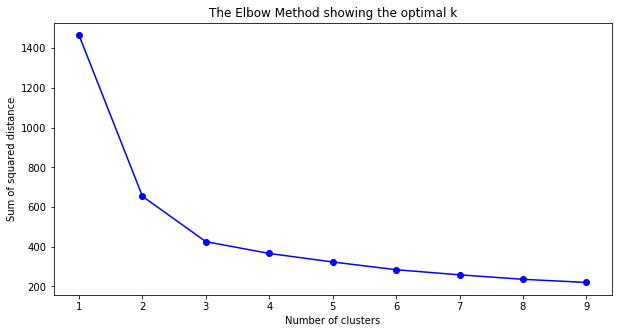

[[62  2  6]
 [ 5 65  0]
 [ 4  0 66]]
purity score: 91.9047619047619 %


In [28]:
#PCA99
# k means determine k
TotalSqrtDist99 = []
K_range = range(1,10)
for k in K_range:
    kmeanpca99 = KMeans(n_clusters=k,random_state = 0,max_iter=500).fit(score_pca99)
    TotalSqrtDist99.append(kmeanpca99.inertia_)

# Plot the elbow
plt.figure(figsize =(10,5))
plt.plot(K_range, TotalSqrtDist99, 'bx-', marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Perform kmeans with PCA89
kmeans99 = KMeans(n_clusters=3,init='k-means++',random_state =0,max_iter=500)
kmeans99.fit(score_pca99)
centroids99 = kmeans99.cluster_centers_
labels99 = kmeans99.labels_
y_pred99 = kmeans99.fit_predict(score_pca99)

#compute confausion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix99 = confusion_matrix(y_true, y_pred99)
print(confusion_matrix99)

# Return cluster accuracy
row_ind, col_ind = linear_sum_assignment(-confusion_matrix99)
purityscore99 = confusion_matrix99[row_ind, col_ind].sum() / np.sum(confusion_matrix99)
print('purity score:',purityscore99*100,"%")

Text(0.5, 1.0, 'Purity scores againt captured variances')

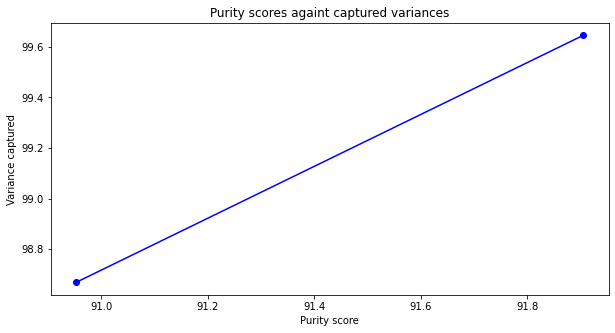

In [29]:
plt.figure(figsize =(10,5))
plt.plot([90.95238095238095,91.9047619047619],[98.6683,99.6449],'bx-',marker='o')
plt.xlabel("Purity score")
plt.ylabel("Variance captured")
plt.title('Purity scores againt captured variances')

In [30]:
print('The figure show an uptrend line which indicates that the greater the variance captures,the greater the purity score is. In other words, this experiment shows the improvement in accuracy of clustering results by apply PCA before clustering.')

The figure show an uptrend line which indicates that the greater the variance captures,the greater the purity score is. In other words, this experiment shows the improvement in accuracy of clustering results by apply PCA before clustering.


In [31]:
#Further analysis
#The minimum dimension that captures at least 69% variance
pca69 =PCA(n_components = 0.69)
pca69.fit(Xnorm)
score_pca69 = pca69.transform(Xnorm)
print('PCA 69% shape:',score_pca69.shape)

#The minimum dimension that captures at least 69% variance
pca79 =PCA(n_components = 0.79)
pca79.fit(Xnorm)
score_pca79 = pca79.transform(Xnorm)
print('PCA 79% shape:',score_pca79.shape)

#Using the same technique to calculate Kmeans clustering and purity score, 
#Purity score of variance at 69% is 85.71428571428571 % and purity of varinace at 79% is 90.95238095238095%.

PCA 69% shape: (210, 1)
PCA 79% shape: (210, 2)


In [32]:
print('From the further analysis, purity score of variance captured at 69% is approximately 85.71%. This result is a supportive evidence to prove that applying PCA before clustering could improve the purity scores.')

From the further analysis, purity score of variance captured at 69% is approximately 85.71%. This result is a supportive evidence to prove that applying PCA before clustering could improve the purity scores.


3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

Curved structured data is considered as nonlinear dataset. There are assumptions for using PCA and one of them is there should be linear relationship between variables. Therefore, as long as there is a linear relationship between all variables, both linear and curved structural data can apply PCA. If there aren't any linear relationships, we can transform data to make it more linear. 

However, if the dataset is highly nonlinear using PCA will distort the distances between points and most likely the downstream algorithm will yield misleading results. 